In [51]:
from src.data_analysis import DataUnivariateVisualization
from cashe import get_cashed_input

In [22]:
df = get_cashed_input()

In [52]:
analyzer = DataUnivariateVisualization(df)

In [53]:
df

,CREATED_BY_USER,CREATION_DATE,VISIT_ID,NET_WITH_VAT,SERVICE_DESCRIPTION,QTY,LINE_CLAIMED_AMOUNT,LINE_CLAIMED_AMOUNT_SAR,CO_PAY,CO_INSURANCE,...,ELIGIBILITY_API_TRANS_ID,CLAIM_IDENTIFIER,ATTACHED_FILES,ATTACHMENT_TYPE,NEW_BORN,PATIENT_IDENTITY_TYPE,BILLABLE_PERIOD_START,BILLABLE_PERIOD_END,BATCH_PERIOD_START,BATCH_PERIOD_END
0,9521,2024-04-04 22:57:57,230089,56.12,Unlisted Code,1.0,61.00,61.00,0.00,61.00,...,1680350.0,4430078.0,929362-34-4430078_OPDUCAF_2024-04-04_22-57-36_...,FILE,N,H,2024-03-28 00:00:00,2024-04-11 00:00:00,2024-03-01,2024-03-31
1,9521,2024-04-04 23:02:21,230117,202.40,TSH,1.0,220.00,220.00,0.00,220.00,...,1643690.0,4430087.0,1083147-3-4430087_OPDUCAF_2024-04-04_23-01-52_...,FILE,N,H,2024-03-12 00:00:00,2024-03-26 00:00:00,2024-03-01,2024-03-31
2,9521,2024-04-04 23:08:38,230160,408.08,In vivo laboratory,1.0,475.00,475.00,10.75,464.25,...,1616370.0,4430098.0,1339075-6-4430098_OPDUCAF_2024-04-04_23-08-22_...,FILE,N,H,2024-03-04 00:00:00,2024-03-18 00:00:00,2024-03-01,2024-03-31
3,9521,2024-04-04 22:26:08,229872,24.27,ELICA-M CREAM 30 GM,1.0,25.55,25.55,4.85,20.70,...,1638278.0,4430011.0,656928-60-4430011_OPDUCAF_2024-04-04_22-25-48_...,FILE,N,H,2024-03-10 00:00:00,2024-03-24 00:00:00,2024-03-01,2024-03-31
4,9521,2024-04-04 22:34:22,229913,80.64,Peripheral intravenous cannula,1.0,90.00,90.00,14.40,75.60,...,1657180.0,4430028.0,1019628-25-4430028_OPDUCAF_2024-04-04_22-33-56...,FILE,N,H,2024-03-18 00:00:00,2024-04-01 00:00:00,2024-03-01,2024-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488828,9593,2024-01-23 17:20:54,204110,242.48,Quantitative Troponin (Protein) Analysis,1.0,324.39,324.39,0.00,324.39,...,NaN,4404986.0,1348956-2-4404986_OPDUCAF_2024-01-23_17-17-31_...,FILE,N,IQ,2023-12-24 10:28:07,2023-12-28 12:07:18,2023-12-01,2023-12-31
488829,10962,2024-01-28 01:01:05,204377,1.06,NEBILET 5MG TABLETS,1.0,1.14,1.14,0.00,1.14,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31
488830,10962,2024-01-28 01:01:05,204377,1.14,Unlisted Procedure Code,5.0,1.77,1.77,0.00,1.77,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31
488831,10962,2024-01-28 01:01:05,204377,1.79,SALURIN 20MG-2ML AMPOULES,1.0,1.93,1.93,0.00,1.93,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31


E:\Projects\Claims_Rejection\src\data_analysis.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


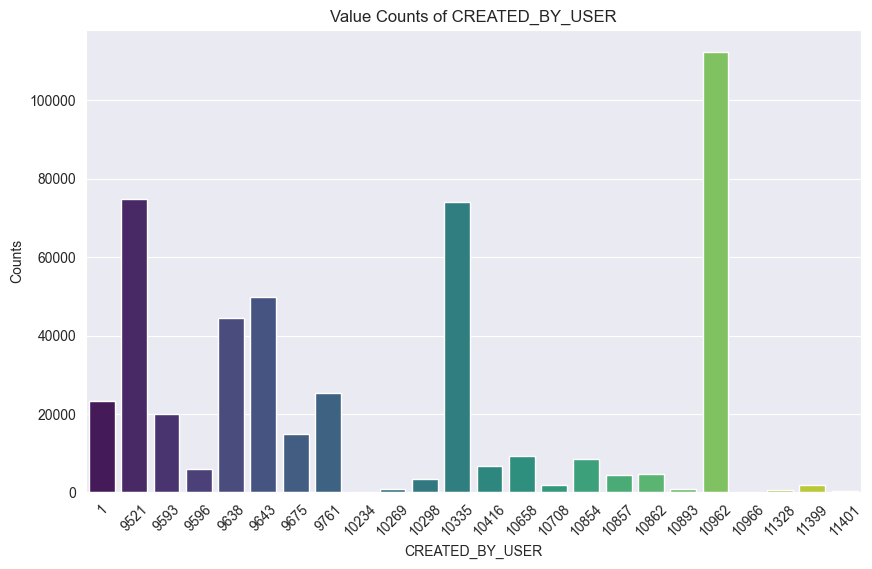

In [54]:
analyzer.plot_value_counts('CREATED_BY_USER')

E:\Projects\Claims_Rejection\src\data_analysis.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


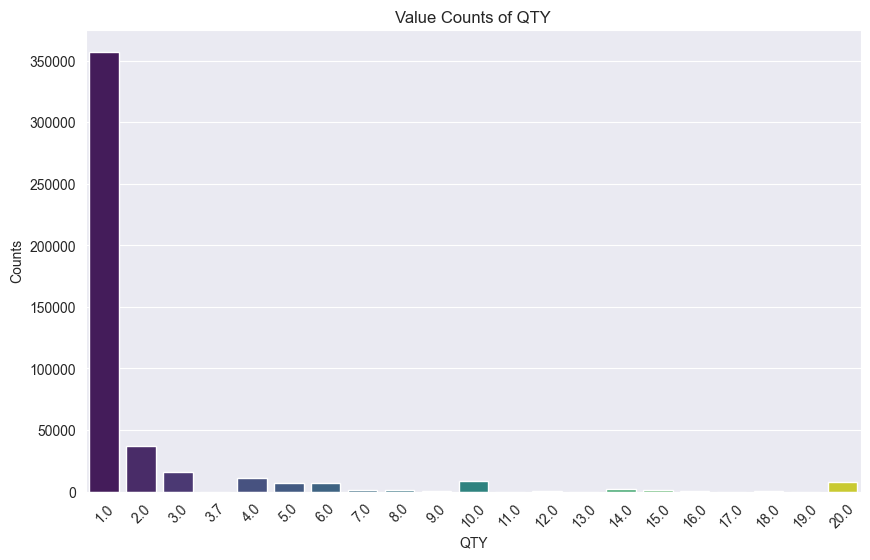

In [55]:
analyzer.plot_value_counts('QTY',xlim=20) ## Higher quantity, which is bigger than 10 could be rejected

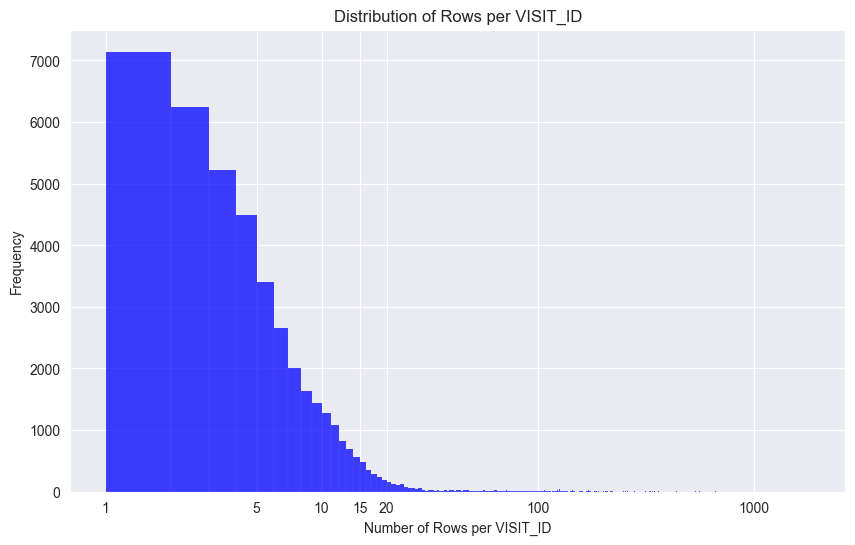

In [56]:
analyzer.plot_distribution('VISIT_ID') ## Common independent Service count per claim

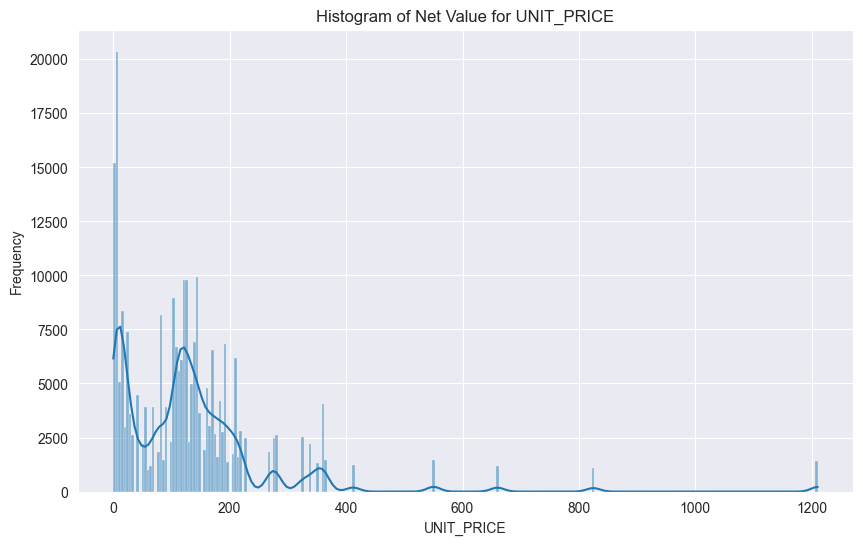

In [57]:
col = 'UNIT_PRICE'
analyzer.plot_histogram(col,threshold=1000) ## IS_EXPENSIVE: (Boolean) TRUE when > 600 SAR else: FALSE

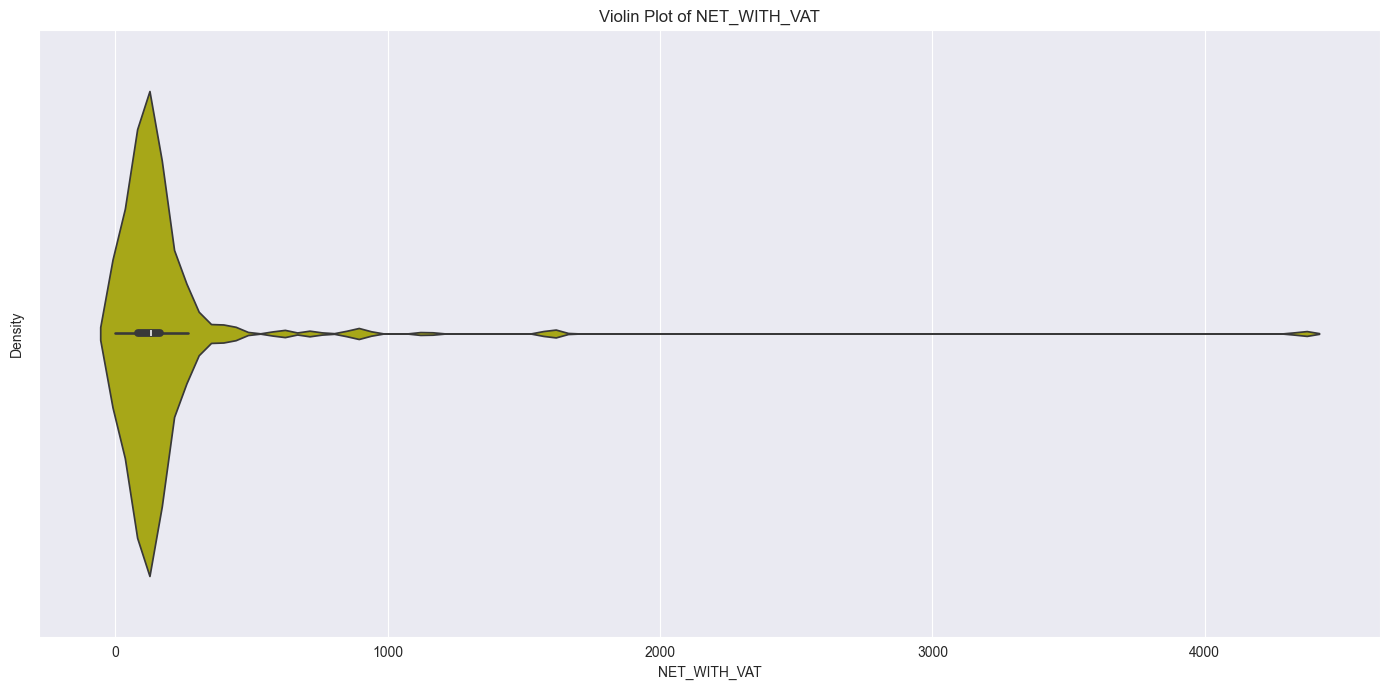

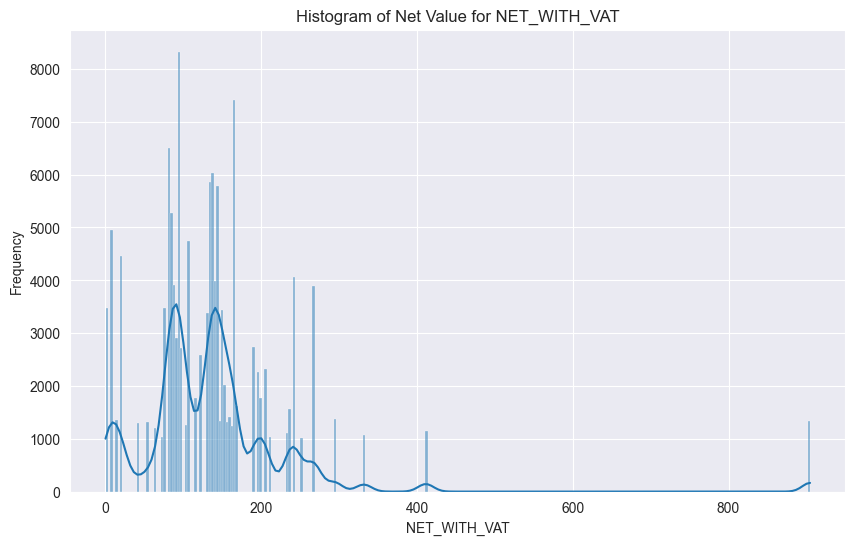

In [33]:
col = 'NET_WITH_VAT'
analyzer.plot_violin_distribution(col,threshold=500)
analyzer.plot_histogram(col,threshold=1000)

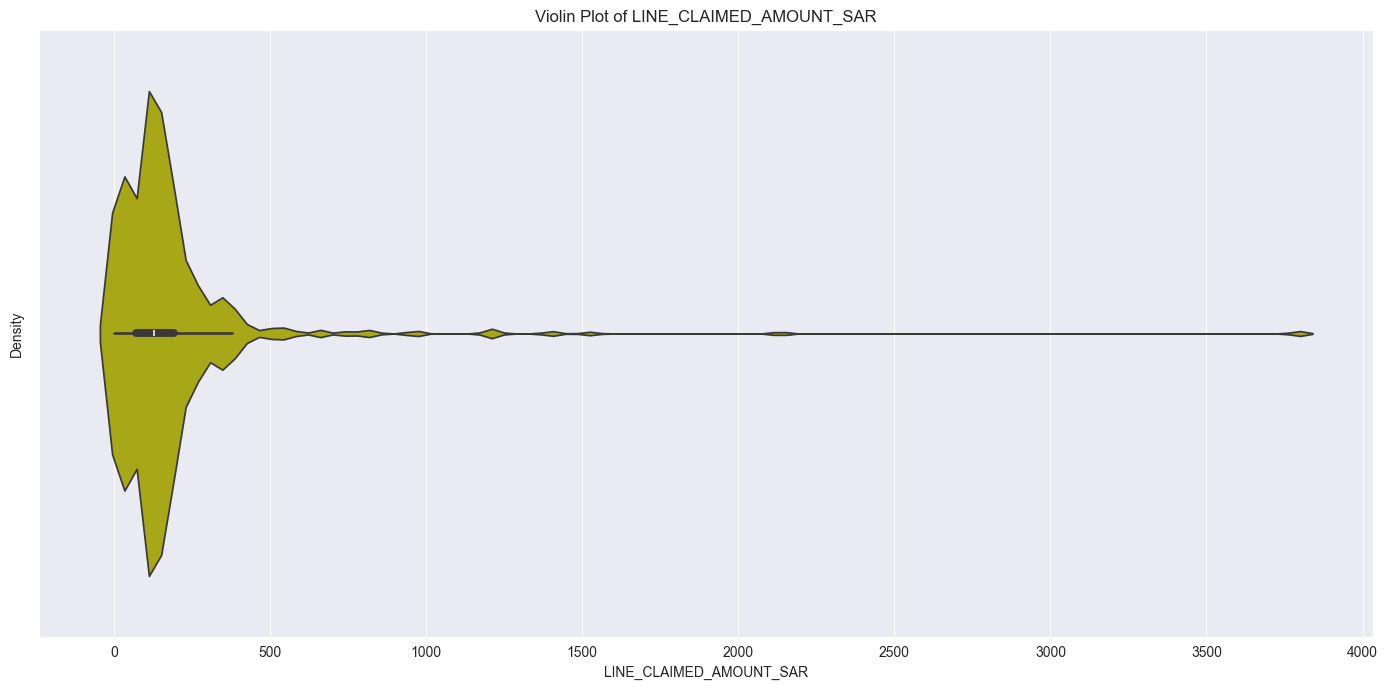

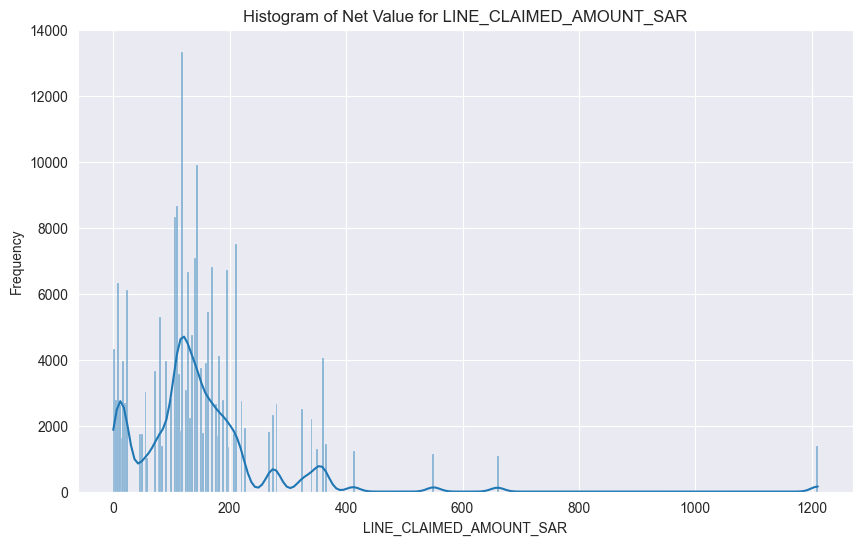

In [34]:
col = 'LINE_CLAIMED_AMOUNT_SAR'
analyzer.plot_violin_distribution(col,threshold=500)
analyzer.plot_histogram(col,threshold=1000)

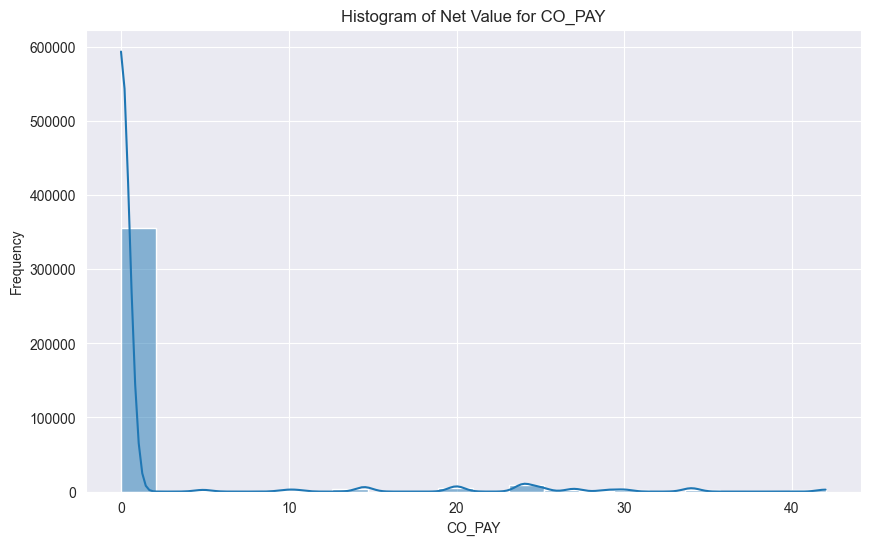

In [35]:
col = 'CO_PAY'
analyzer.plot_histogram(col,threshold=1000)

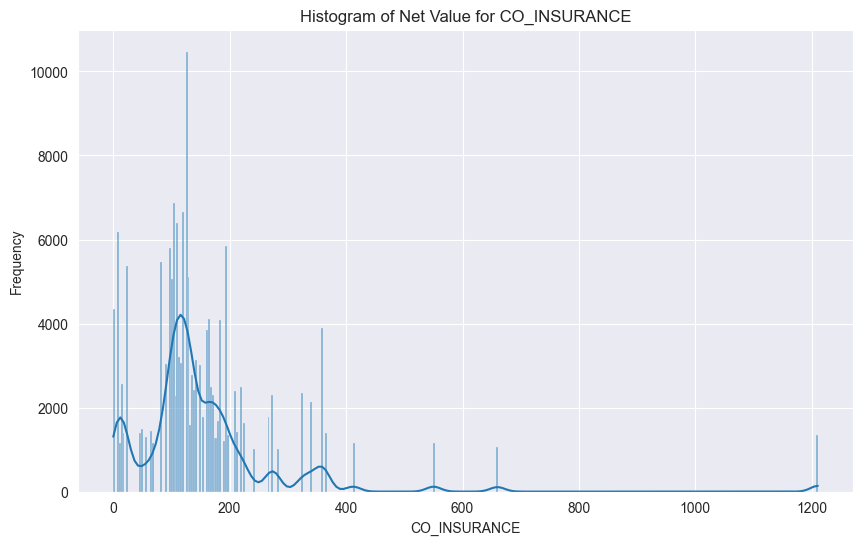

In [36]:
col = 'CO_INSURANCE'
analyzer.plot_histogram(col,threshold=1000)

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


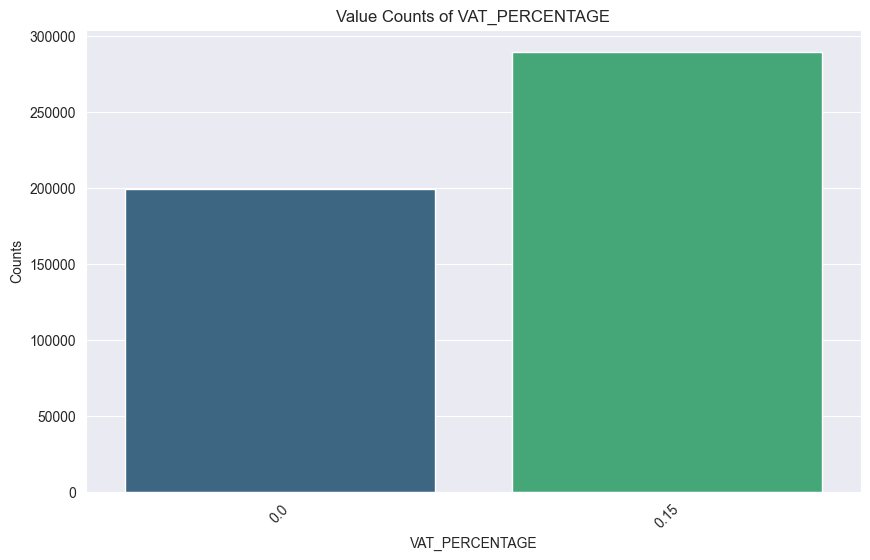

In [38]:
analyzer.plot_value_counts('VAT_PERCENTAGE')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


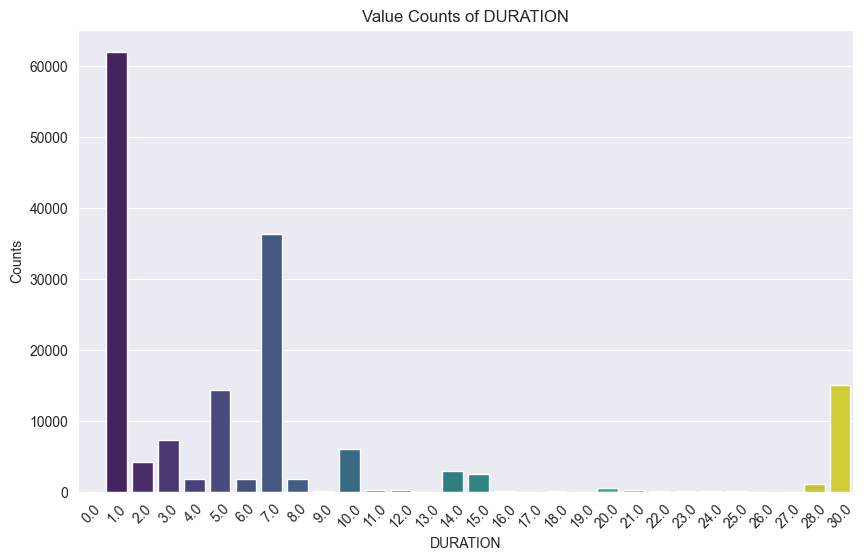

In [39]:
analyzer.plot_value_counts('DURATION',xlim=30) ## DURATION PER SERVICE could be an indicator

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


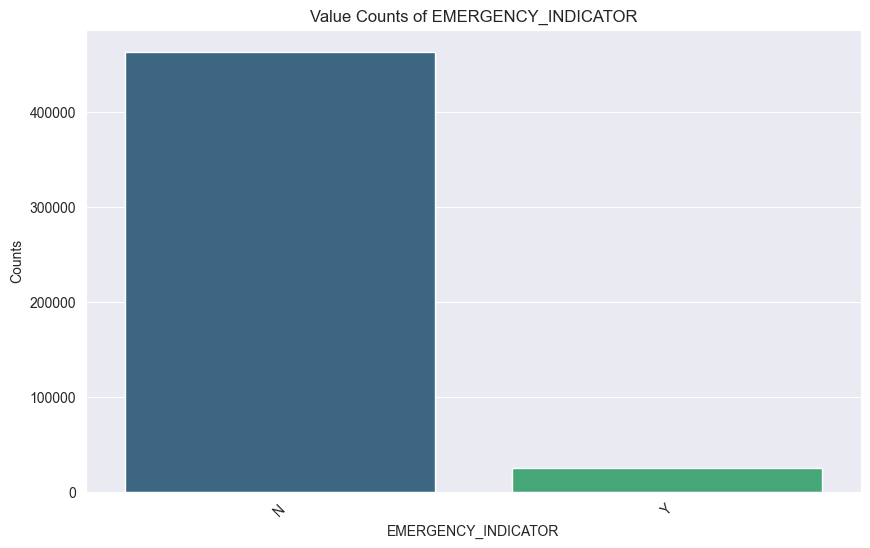

In [40]:
analyzer.plot_value_counts('EMERGENCY_INDICATOR')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


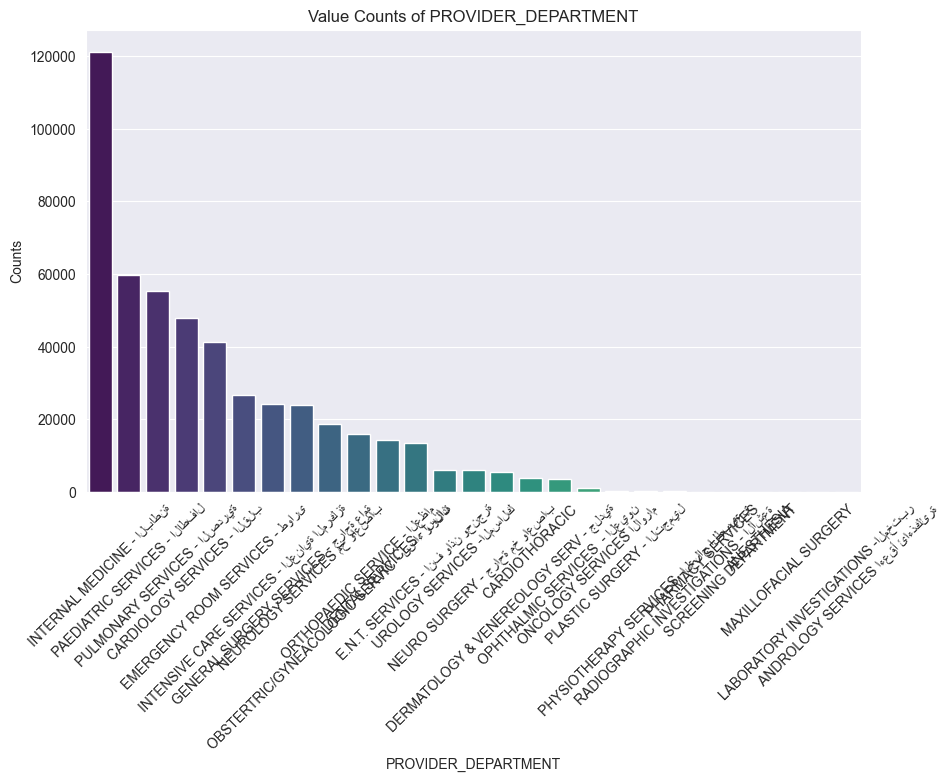

In [41]:
analyzer.plot_value_counts('PROVIDER_DEPARTMENT')

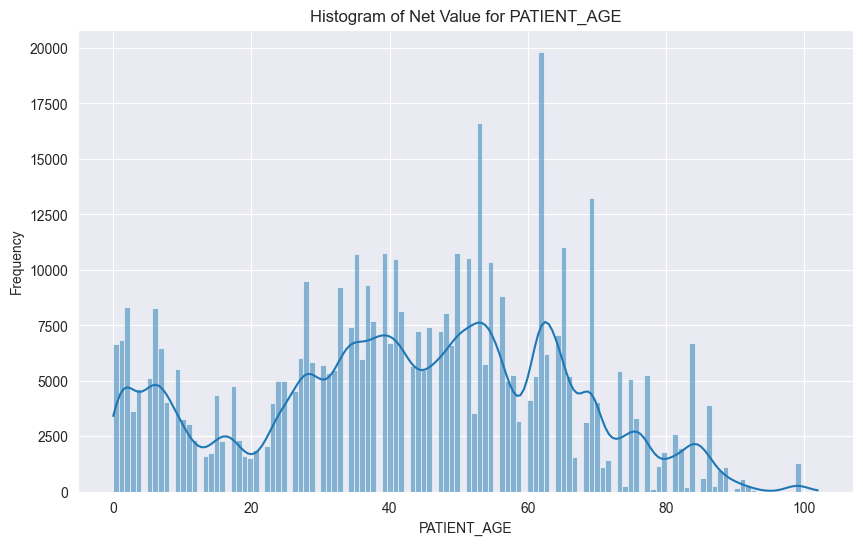

In [42]:
analyzer.plot_histogram('PATIENT_AGE')

In [44]:
df2 = analyzer.filter_column_by_value_count('PATIENT_NATIONALITY',threshold=50)

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


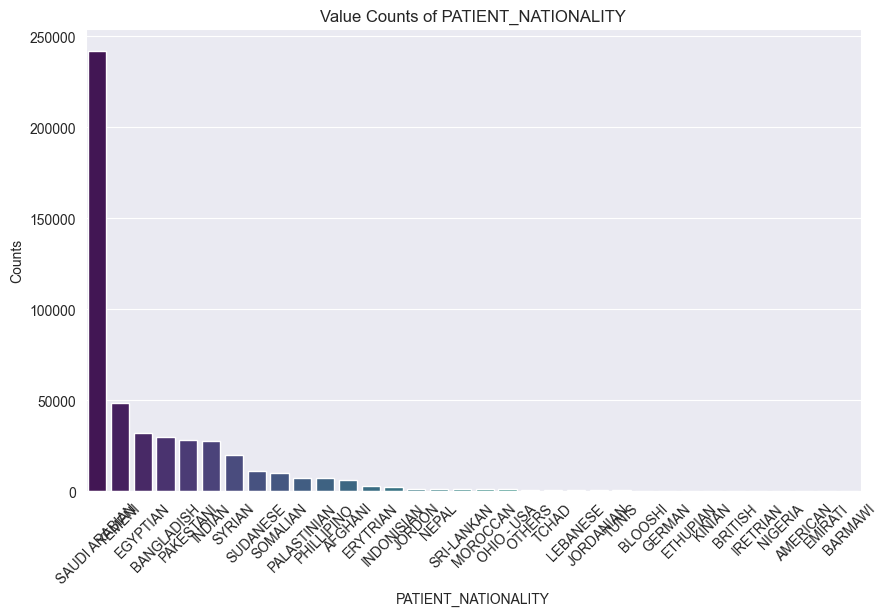

In [45]:
DataUnivariateVisualization(df2).plot_value_counts('PATIENT_NATIONALITY')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


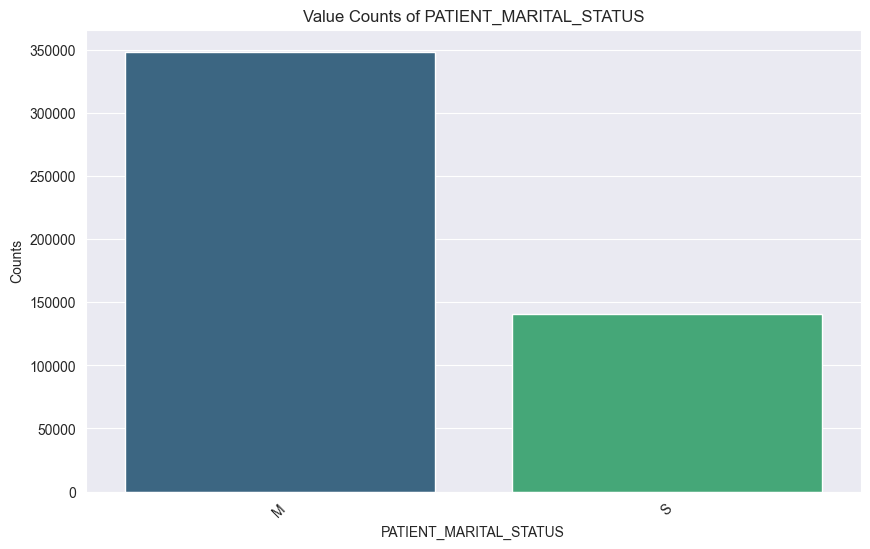

In [46]:
analyzer.plot_value_counts('PATIENT_MARITAL_STATUS')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


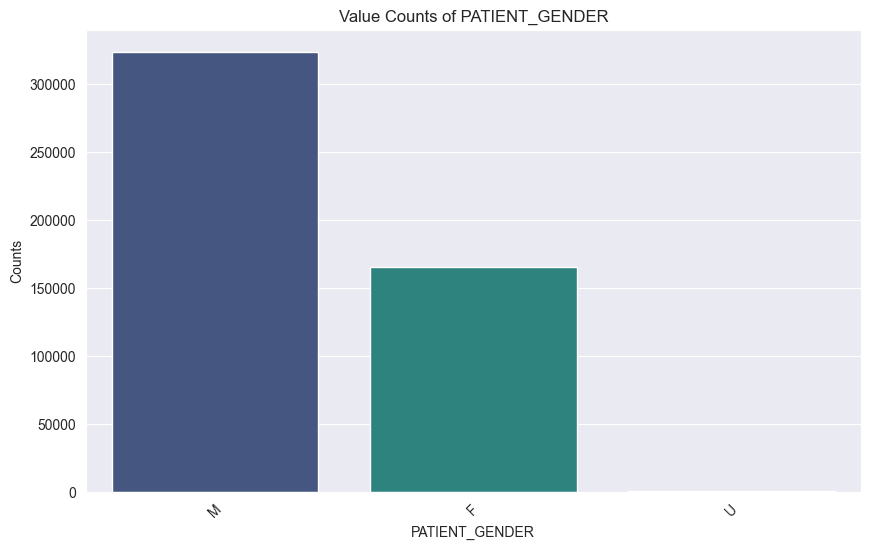

In [47]:
analyzer.plot_value_counts('PATIENT_GENDER')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


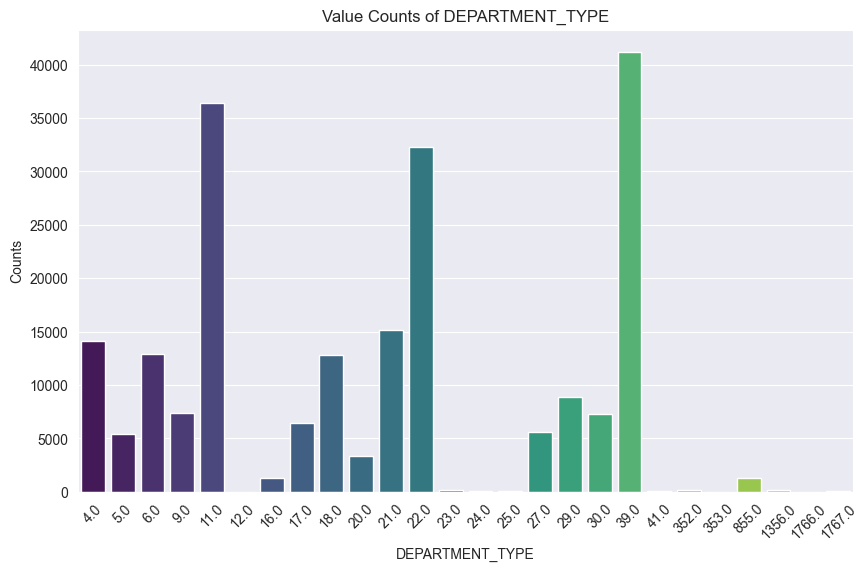

In [48]:
analyzer.plot_value_counts('DEPARTMENT_TYPE')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


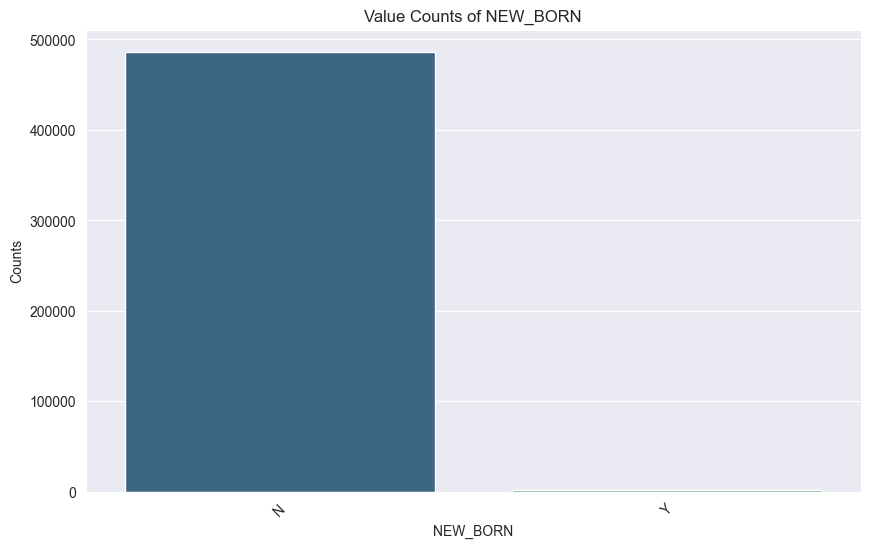

In [49]:
analyzer.plot_value_counts('NEW_BORN')

C:\Users\omar.mounir\AppData\Local\Temp\ipykernel_4272\3443969039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


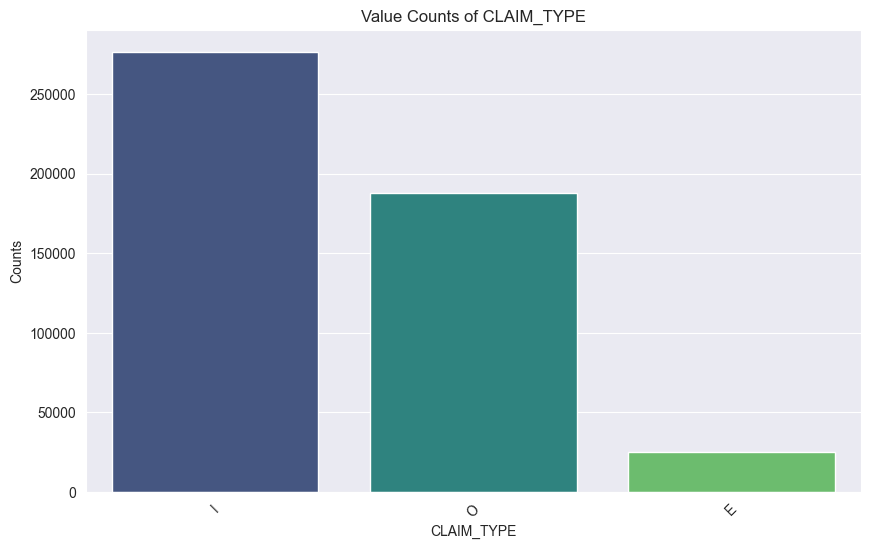

In [50]:
analyzer.plot_value_counts('CLAIM_TYPE')

In [ ]:
df.columns

Index(['CREATED_BY_USER', 'CREATION_DATE', 'VISIT_ID', 'NET_WITH_VAT',
       'SERVICE_DESCRIPTION', 'QTY', 'LINE_CLAIMED_AMOUNT',
       'LINE_CLAIMED_AMOUNT_SAR', 'CO_PAY', 'CO_INSURANCE',
       'LINE_ITEM_DISCOUNT', 'NET_AMOUNT', 'NET_VAT_AMOUNT',
       'PATIENT_VAT_AMOUNT', 'VAT_PERCENTAGE', 'TREATMENT_TYPE_INDICATOR',
       'SERVICE_TYPE', 'DURATION', 'QTY_STOCKED_UOM', 'UNIT_PRICE',
       'OASIS_IOS_DESCRIPTION', 'SEQUENCE_NO', 'UNIT_PRICE_STOCKED_UOM',
       'UNIT_PRICE_NET', 'DISCOUNT_PERCENTAGE', 'NOTES', 'OUTCOME',
       'APPROVED_QUNATITY', 'REQUEST_DATE', 'VISIT_NO', 'VISIT_DATE',
       'EMERGENCY_INDICATOR', 'PROVIDER_DEPARTMENT_CODE',
       'PROVIDER_DEPARTMENT', 'DOCTOR_SPECIALTY_CODE', 'DOCTOR_CODE',
       'PATIENT_NO', 'EPISODE_NO', 'PATIENT_ID', 'MEMBERSHIP_NO',
       'PATIENT_ID_TYPE', 'PATIENT_NATIONAL_IQAMA_ID', 'PATIENT_DOB',
       'PATIENT_AGE', 'UNIT_OF_AGE', 'PATIENT_NATIONALITY',
       'PATIENT_MARITAL_STATUS', 'PATIENT_GENDER', 'PATIENT_MOBILE_NO'